In [ ]:
DATA ANALYSIS AND DATASCIENCE USING PYTHON
Task 3: Clustering Analysis– Customer Segmentation

In [54]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Set before importing scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [ ]:
 Step 1: Dataset Selection

In [3]:
data = {
    "Customer ID": range(1, 201),
    "Age": np.random.randint(18, 65, 200),
    "Annual Income": np.random.randint(15000, 100000, 200),
    "Spending Score": np.random.randint(1, 100, 200)
}
df = pd.DataFrame(data)

In [ ]:
Step 2: Tasks to Perform

In [ ]:
 1. Load the Dataset

In [23]:
#Inspecting the dataset
print(df.head())
print(df.info())

   Customer ID  Age  Annual Income  Spending Score
0            1   25          74345              38
1            2   46          42301              82
2            3   23          51170              23
3            4   57          19651              49
4            5   49          45851              76
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Customer ID     200 non-null    int64
 1   Age             200 non-null    int32
 2   Annual Income   200 non-null    int32
 3   Spending Score  200 non-null    int32
dtypes: int32(3), int64(1)
memory usage: 4.0 KB
None


In [17]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Customer ID       0
Age               0
Annual Income     0
Spending Score    0
dtype: int64


In [ ]:
 2. Data Preprocessing

In [25]:
features = df[['Age', 'Annual Income', 'Spending Score']]

In [27]:
# Standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


F:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

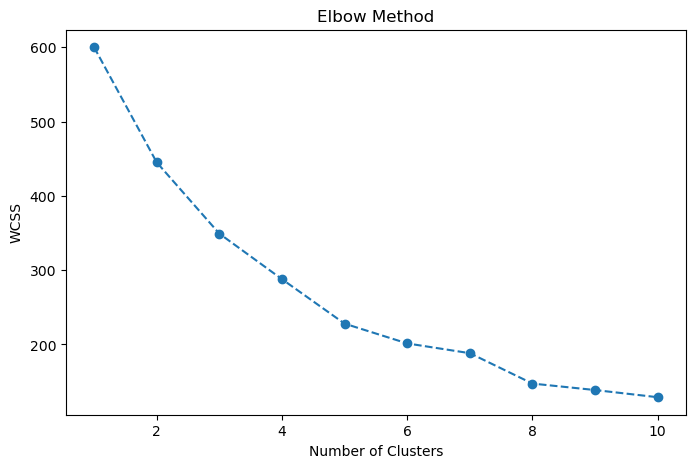

In [76]:
#:Finding the optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


F:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

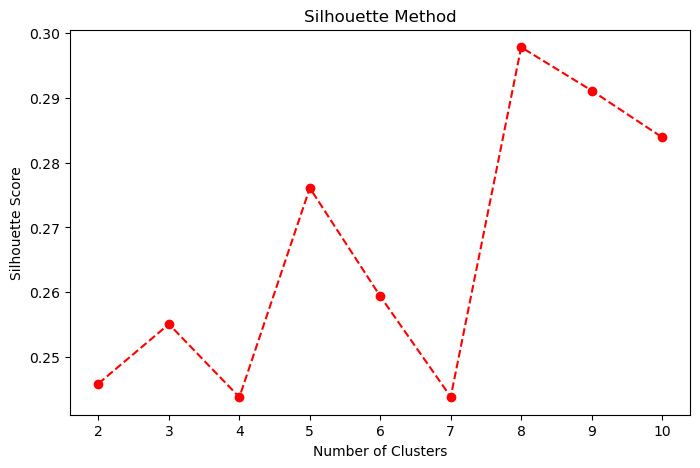

In [74]:
#:Finding the optimal number of clusters using Silhouette Score
sil_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    sil_scores.append(silhouette_score(scaled_features, labels))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sil_scores, marker='o', linestyle='--', color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

In [60]:
# Optimal clusters (choose based on Elbow Method or Silhouette Score)
optimal_clusters = 5  # Adjust as per the Elbow method

In [72]:
#:Applying K-Means Clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

F:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


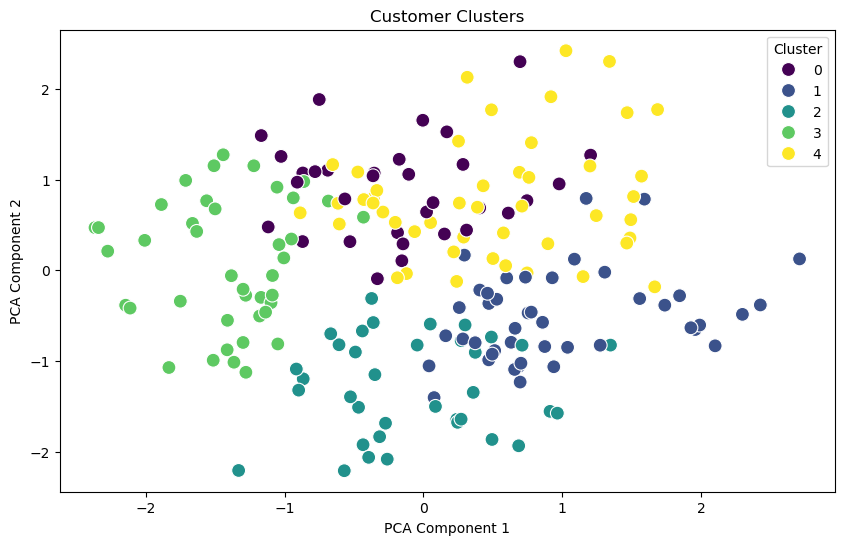

In [64]:
#:Visualization using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=df['Cluster'], palette='viridis', s=100)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Clusters")
plt.show()

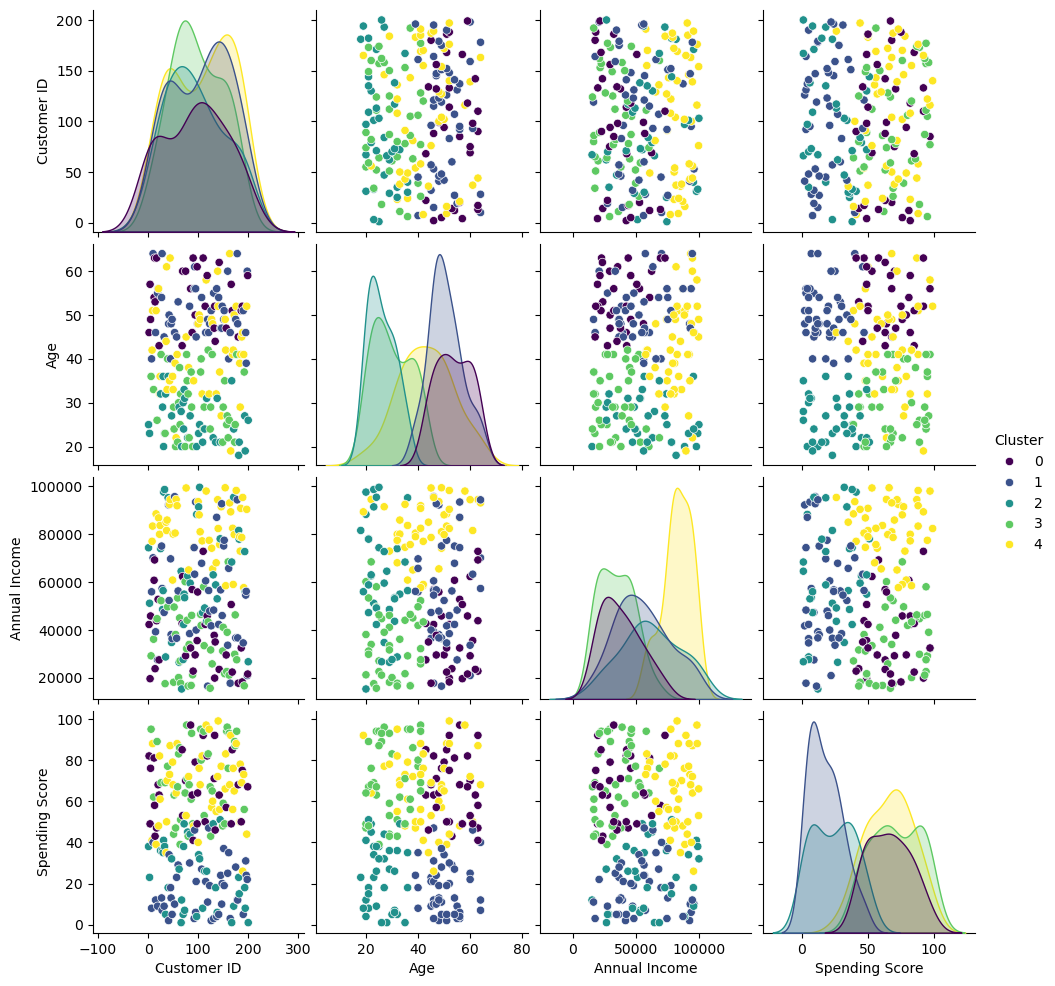

In [66]:
#:Pair Plot for further insights
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()

In [68]:
#:Recommendations based on clusters
for cluster in range(optimal_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(f"- Average Age: {cluster_data['Age'].mean():.2f}")
    print(f"- Average Annual Income: ${cluster_data['Annual Income'].mean():.2f}")
    print(f"- Average Spending Score: {cluster_data['Spending Score'].mean():.2f}\n")
    

Cluster 0:
- Average Age: 53.50
- Average Annual Income: $38228.69
- Average Spending Score: 66.09

Cluster 1:
- Average Age: 50.57
- Average Annual Income: $55167.02
- Average Spending Score: 17.82

Cluster 2:
- Average Age: 26.00
- Average Annual Income: $61596.86
- Average Spending Score: 23.86

Cluster 3:
- Average Age: 29.98
- Average Annual Income: $34931.24
- Average Spending Score: 70.93

Cluster 4:
- Average Age: 42.96
- Average Annual Income: $82494.62
- Average Spending Score: 66.19

